In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-data-science-books/final_book_dataset_kaggle.csv


# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

# Load data

In [3]:
df = pd.read_csv("/kaggle/input/amazon-data-science-books/final_book_dataset_kaggle.csv")
df.head()

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...


# Data preparaion

## Drop missing data

In [4]:
df.dropna(inplace=True)

## Filter English book

In [5]:
df = df.loc[df.language == "English"]
df.head(3)

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...


## Remove unneed coloumns 

In [6]:
drop_cols_unneed = ['author','language','ISBN_13','link','complete_link','dimensions']
df.drop(drop_cols_unneed, axis=1, inplace=True)
df.head(3)

,title,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight,publisher
0,Becoming a Data Head: How to Think Speak and U...,24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,12.5 ounces,Wiley; 1st edition (April 23 2021)
1,Ace the Data Science Interview: 201 Real Inter...,26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,1.28 pounds,Ace the Data Science Interview (August 16 2021)
2,Fundamentals of Data Engineering: Plan and Bui...,50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,1.57 pounds,OReilly Media; 1st edition (July 26 2022)


## Handle publisher

In [7]:
df.publisher[:20]

0                    Wiley; 1st edition (April 23 2021)
1       Ace the Data Science Interview (August 16 2021)
2             OReilly Media; 1st edition (July 26 2022)
3              OReilly Media; 1st edition (July 5 2022)
4        OReilly Media; 1st edition (September 17 2013)
5              OReilly Media; 2nd edition (May 16 2019)
6              OReilly Media; 2nd edition (June 2 2020)
7                       No Starch Press (August 2 2022)
10          For Dummies; 3rd edition (September 1 2021)
11                  Packt Publishing (February 28 2022)
12                              Manning (April 27 2021)
13                 Packt Publishing (September 30 2021)
14             OReilly Media; 1st edition (May 11 2021)
15              Cambridge University Press (May 6 2021)
17    Packt Publishing; 2nd ed. edition (April 29 2021)
18            McGraw Hill; 1st edition (August 21 2019)
19                         Basic Books (August 17 2021)
20                     Packt Publishing (March 3

In [8]:
# Change type of publisher column: object -> string
df.publisher = df.publisher.astype("string")

### Filter publisher

In [9]:
def handle_publisher(df):
    for index, name in enumerate(df.publisher):
        if ';' in name:
            df.publisher[index] = name.split(';')[0]
        else:
            df.publisher[index] = name.split(' (')[0]
            

    return df

df = handle_publisher(df)

### Get top 20 publisher having most books

In [10]:
temp = pd.DataFrame(df.publisher.value_counts()[:20])
temp.T.columns

Index(['Packt Publishing', 'OReilly Media', 'Independently published',
       'Manning', 'Wiley', 'Pearson', 'Cambridge University Press',
       'No Starch Press', 'Springer', 'Apress', 'SAGE Publications Inc',
       'CreateSpace Independent Publishing Platform', 'For Dummies',
       'BPB Publications', 'Routledge', 'SAS Institute', 'Cengage Learning',
       'Oxford University Press', 'SAGE Publications Ltd', 'McGraw Hill'],
      dtype='object')

In [11]:
# Keep only top publisher having more than 10 books
def change_publisher(publisher_name):
    if publisher_name in ['Packt Publishing', 'OReilly Media', 'Independently published',
       'Springer', 'Manning', 'Wiley', 'Pearson', 'No Starch Press',
       'Cambridge University Press', 'SAGE Publications Inc',
       'Chapman and Hall/CRC', 'CreateSpace Independent Publishing Platform',
       'Apress', 'SAGE Publications Ltd', 'Routledge', 'BPB Publications',
       'The MIT Press', 'Addison-Wesley Professional', 'Cengage Learning',
       'For Dummies']:
        return publisher_name
    else:
        return "Others"
    
df.publisher = df.publisher.apply(lambda publisher:change_publisher(publisher))

In [12]:
df.head()

,title,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight,publisher
0,Becoming a Data Head: How to Think Speak and U...,24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,12.5 ounces,Wiley
1,Ace the Data Science Interview: 201 Real Inter...,26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,1.28 pounds,Others
2,Fundamentals of Data Engineering: Plan and Bui...,50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,1.57 pounds,OReilly Media
3,Essential Math for Data Science: Take Control ...,44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,1.23 pounds,OReilly Media
4,Data Science for Business: What You Need to Kn...,36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,1.5 pounds,OReilly Media


## Handle weight column

In [13]:
def handle_weight(weight_str):
    return weight_str.split(" ")[0]
    
df.weight = df.weight.apply(lambda weight_str:handle_weight(weight_str))

## Change data type

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 945
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        697 non-null    object 
 1   price        697 non-null    float64
 2   pages        697 non-null    float64
 3   avg_reviews  697 non-null    float64
 4   n_reviews    697 non-null    int64  
 5   star5        697 non-null    float64
 6   star4        697 non-null    float64
 7   star3        697 non-null    float64
 8   star2        697 non-null    float64
 9   star1        697 non-null    float64
 10  weight       697 non-null    object 
 11  publisher    697 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 87.0+ KB


In [15]:
df.title = df.title.astype("string")
df.publisher = df.publisher.astype("string")

df.pages = df.pages.astype("int64")
df.weight = df.weight.astype("float64")

# Exploratory Data Analysis (EDA)

In [16]:
df.describe()

,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,50.499885,429.802009,4.443759,151.096126,0.718737,0.162253,0.067145,0.030488,0.021291,3.812253
std,36.405928,204.171316,0.401712,535.520196,0.150276,0.105193,0.063193,0.040305,0.033387,4.118740
min,8.990000,48.000000,1.000000,1.000000,0.110000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,31.990000,286.000000,4.300000,10.000000,0.620000,0.110000,0.000000,0.000000,0.000000,1.440000
50%,41.990000,392.000000,4.500000,33.000000,0.720000,0.150000,0.060000,0.020000,0.000000,1.970000
75%,51.890000,542.000000,4.700000,102.000000,0.800000,0.200000,0.090000,0.040000,0.040000,3.310000
max,279.950000,1728.000000,5.000000,7563.000000,1.000000,0.630000,0.400000,0.250000,0.230000,17.450000


Look at the n_reviews column, the standard deviation is very large (~535 reviews).

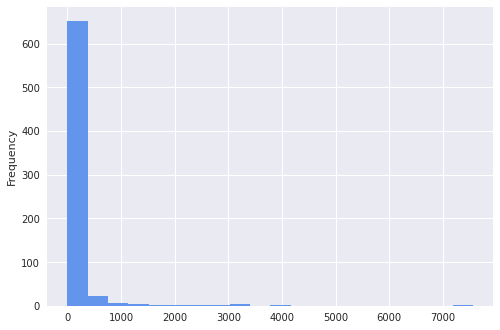

In [17]:
df.n_reviews.plot(kind='hist', bins=20, color='cornflowerblue');

We need to create new dataset with books having more than 1000 reviews.

In [18]:
new_df = df.query('n_reviews > 1000').reset_index(drop=True)

## Top books have most reviews

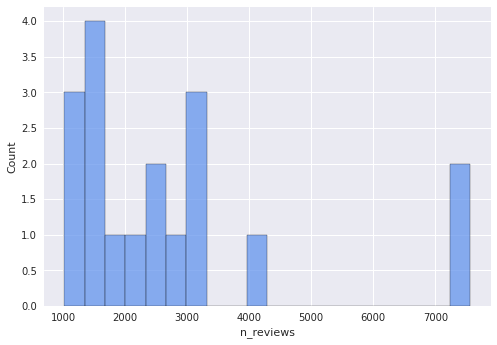

In [19]:
sns.histplot(data=new_df.n_reviews, bins=20, color='cornflowerblue');

In [20]:
new_df.sort_values(by="n_reviews",ascending=False).reset_index(drop=True)

,title,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight,publisher
0,Cracking the Coding Interview: 189 Programming...,35.95,687,4.7,7563,0.81,0.12,0.04,0.01,0.02,2.69,Packt Publishing
1,Python Crash Course 2nd Edition: A Hands-On Pr...,21.49,544,4.7,7425,0.81,0.13,0.04,0.01,0.01,2.30,Others
2,Python: - The Bible- 3 Manuscripts in 1 book: ...,27.97,375,4.3,4033,0.64,0.16,0.10,0.04,0.06,1.11,Independently published
3,Storytelling with Data: A Data Visualization G...,28.49,288,4.6,3313,0.76,0.15,0.05,0.01,0.02,1.46,OReilly Media
4,Designing Data-Intensive Applications: The Big...,23.37,611,4.8,3167,0.85,0.09,0.03,0.01,0.02,2.15,Independently published
5,Python: For Beginners: A Crash Course Guide To...,17.97,135,4.3,3034,0.66,0.16,0.10,0.03,0.05,6.70,Others
6,The Art of Statistics: How to Learn from Data,17.99,448,4.6,2764,0.73,0.19,0.05,0.01,0.01,13.60,OReilly Media
7,Automate the Boring Stuff with Python 2nd Edit...,26.49,592,4.7,2538,0.82,0.12,0.03,0.01,0.01,2.48,Others
8,Python for Everybody: Exploring Data in Python 3,9.99,247,4.6,2467,0.76,0.15,0.05,0.02,0.02,15.20,Packt Publishing
9,The Pragmatic Programmer: Your Journey To Mast...,30.26,352,4.8,2026,0.85,0.11,0.02,0.01,0.00,1.68,Cengage Learning


Top books have more than 1000 reviews.

In [21]:
df.query('n_reviews >= 4000').reset_index(drop=True)

,title,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight,publisher
0,Python Crash Course 2nd Edition: A Hands-On Pr...,21.49,544,4.7,7425,0.81,0.13,0.04,0.01,0.01,2.30,Others
1,Cracking the Coding Interview: 189 Programming...,35.95,687,4.7,7563,0.81,0.12,0.04,0.01,0.02,2.69,Packt Publishing
2,Python: - The Bible- 3 Manuscripts in 1 book: ...,27.97,375,4.3,4033,0.64,0.16,0.10,0.04,0.06,1.11,Independently published


There are only 3 books with more than 4000 reviews.

## More expensive books have more reviews?

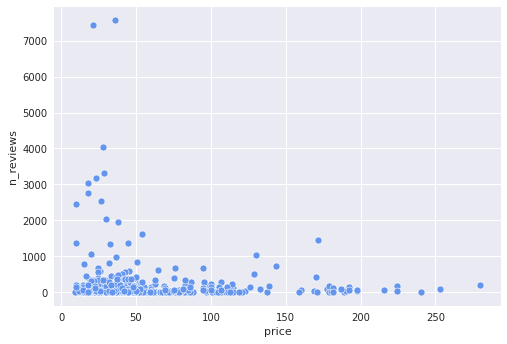

In [22]:
sns.scatterplot(data=df, x='price',y='n_reviews', color='cornflowerblue');

Most of books with large reviews surround by 0 and 50.

Hence, we can't consider more expensive books as more reviews.

## More reviewed books have higher average ratings?

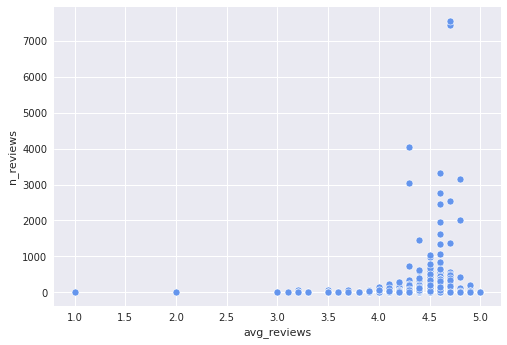

In [23]:
sns.scatterplot(data=df, x='avg_reviews',y='n_reviews', color='cornflowerblue');

In [24]:
pd.set_option('display.max_colwidth', True)

new_df.sort_values(by="n_reviews",ascending=False).reset_index(drop=True)[['n_reviews','avg_reviews','title']]

,n_reviews,avg_reviews,title
0,7563,4.7,Cracking the Coding Interview: 189 Programming Questions and Solutions
1,7425,4.7,Python Crash Course 2nd Edition: A Hands-On Project-Based Introduction to Programming
2,4033,4.3,Python: - The Bible- 3 Manuscripts in 1 book: -Python Programming For Beginners -Python Programming For Intermediates -Python Programming for Advanced (Your place to learn Python with ease)
3,3313,4.6,Storytelling with Data: A Data Visualization Guide for Business Professionals
4,3167,4.8,Designing Data-Intensive Applications: The Big Ideas Behind Reliable Scalable and Maintainable Systems
5,3034,4.3,Python: For Beginners: A Crash Course Guide To Learn Python in 1 Week
6,2764,4.6,The Art of Statistics: How to Learn from Data
7,2538,4.7,Automate the Boring Stuff with Python 2nd Edition: Practical Programming for Total Beginners
8,2467,4.6,Python for Everybody: Exploring Data in Python 3
9,2026,4.8,The Pragmatic Programmer: Your Journey To Mastery 20th Anniversary Edition (2nd Edition)


In [25]:
pd.reset_option('display.max_colwidth')

All books with more than 1000 reviews have over 4.0 average ratings.

# Clustering Books

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(df["title"])

In [27]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,001,10,100,100 essential,100 recipes,100 solved,101,101 data,12,12 classrooms,...,wrong,wrong woefully,xai,xai python,xlminer,youll,youll likely,youtube,youâ,youâ new
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []

# Kmeans clustering
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=600, n_init=10, random_state=1)
   km.fit(X)
   sum_of_squared_distances.append(km.inertia_)

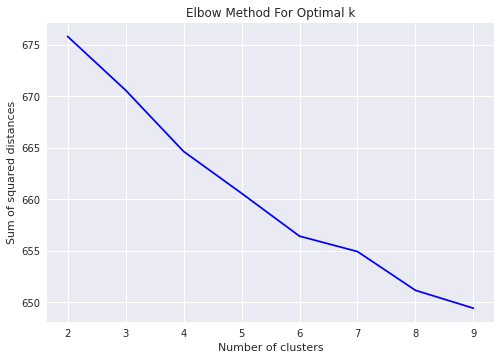

In [29]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [30]:
# Get clusters
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10, random_state=1)
model.fit(X)

# Get prediction/ labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df["title"],labels)),columns=['title','cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
696                  Psychology Statistics For Dummies        0
615  Applied Statistics II: Multivariable and Multi...        0
618  CRC Standard Probability and Statistics Tables...        0
620  Statistics Done Wrong: The Woefully Complete G...        0
622                          Statistics II For Dummies        0
..                                                 ...      ...
343  Deep Learning Pipeline: Building a Deep Learni...        5
305                          Deep Learning For Dummies        5
306                          Deep Learning with Python        5
298  Math for Deep Learning: What You Need to Know ...        5
375  Getting started with Deep Learning for Natural...        5

[697 rows x 2 columns]


In [31]:
!pip install wordcloud==1.8.2.2

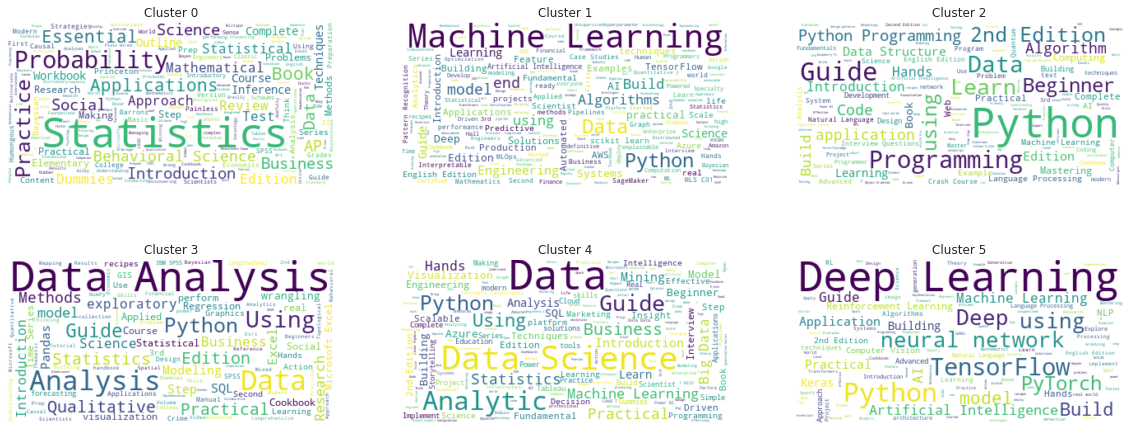

In [32]:
# Create wordclouds for clusters
from wordcloud import WordCloud

fig, ax = plt.subplots(figsize=(20, 8))

for k in range(true_k):
   text = book_cl[book_cl.cluster == k]['title'].str.cat(sep=' ')
   wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white",
                         random_state=1905).generate(text)

   # Create subplot
   plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
   plt.plot()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
#plt.show()
plt.savefig('wordcloud.png')

## Merge cluster with dataset

In [33]:
df['cluster'] = book_cl.cluster

In [34]:
def convert_clusters(num_of_cluster):
    if num_of_cluster == 0:
        return 'Statistic'
    elif num_of_cluster == 1:
        return 'Machine Learning'
    elif num_of_cluster == 2:
        return 'Python'
    elif num_of_cluster == 3:
        return 'Data Analysis'
    elif num_of_cluster == 4:
        return 'Data Science'
    elif num_of_cluster == 5:
        return 'Deep Learning'
    else:
        return 'Others'
        
df['cluster'] = df['cluster'].apply(lambda num_of_cluster:convert_clusters(num_of_cluster))

In [35]:
pd.set_option('display.max_colwidth', True)
df.head(5)

,title,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight,publisher,cluster
0,Becoming a Data Head: How to Think Speak and Understand Data Science Statistics and Machine Learning,24.49,272,4.6,184,0.74,0.18,0.05,0.02,0.01,12.50,Wiley,Data Science
1,Ace the Data Science Interview: 201 Real Interview Questions Asked FAANG Tech Startups & Wall Street,26.00,301,4.5,599,0.77,0.10,0.06,0.03,0.04,1.28,Others,Data Science
2,Fundamentals of Data Engineering: Plan and Build Robust Data Systems,50.76,446,5.0,33,0.96,0.04,0.00,0.00,0.00,1.57,OReilly Media,Data Science
3,Essential Math for Data Science: Take Control of Your Data with Fundamental Linear Algebra Probability and Statistics,44.80,347,4.5,27,0.79,0.05,0.05,0.05,0.05,1.23,OReilly Media,Data Science
4,Data Science for Business: What You Need to Know about Data Mining and Data-Analytic Thinking,36.99,413,4.5,970,0.71,0.15,0.08,0.03,0.03,1.50,OReilly Media,Data Science


## Some books in cluster

In [36]:
def filter_books_in_cluster(cluster_name, top_N):
    cluster_name = cluster_name.title()
    return df.query('cluster == @cluster_name').sort_values(by='n_reviews',ascending=False).reset_index(drop=True).head(top_N)

In [37]:
# Change cluster_name value to filter
cluster_name = 'machine learning'
filter_books_in_cluster(cluster_name,5)

,title,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight,publisher,cluster
0,Purposeful Play: A Teachers Guide to Igniting Deep and Joyful Learning Across the Day,28.34,184,4.7,348,0.82,0.13,0.03,0.01,0.02,12.80,OReilly Media,Machine Learning
1,PYTHON: Learn Coding Programs with Python Programming and Master Data Analysis & Analytics Data Science and Machine Learning with the Complete Crash Course for Beginners - 5 Manuscripts in 1 Book,24.90,400,4.2,282,0.61,0.14,0.11,0.05,0.08,1.90,Packt Publishing,Machine Learning
2,Machine Learning for Algorithmic Trading: Predictive models to extract signals from market and alternative data for systematic trading strategies with Python 2nd Edition,44.99,820,4.5,243,0.68,0.19,0.06,0.03,0.04,3.05,Manning,Machine Learning
3,Memorable teaching: Leveraging memory to build deep and durable learning in the classroom (High Impact Teaching series),14.95,112,4.6,192,0.76,0.16,0.03,0.02,0.03,3.20,Cengage Learning,Machine Learning
4,Differentiation and the Brain: How Neuroscience Supports the Learner-Friendly Classroom (Use Brain-Based Learning and Neuroeducation to Differentiate Instruction),31.38,240,4.7,168,0.82,0.12,0.04,0.01,0.00,1.55,Packt Publishing,Machine Learning


# Save file

In [38]:
df.to_csv("prepared_amazon_ds_book.csv")

## Reference
* Clustering Books: [Thu Vu](https://deepnote.com/workspace/thu-70b82642-3f7e-4ef4-8203-d96ba4531278/project/Data-science-book-analysis-95de68e6-99de-4ef6-b3ae-d76602c45655/notebook/Notebook%201-0bf2948ac9304e31a1360fa7d16e5d48)